In [7]:
#pip install scikit_optimize

In [8]:
#pip install ipython-autotime

In [9]:
#pip install -U memory_profiler
#pip install ipython-autotime
#%load_ext autotime
#%load_ext memory_profiler

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence
from skopt import gp_minimize
from tensorflow import keras
import pickle 

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
cd /content/gdrive/MyDrive/Colab Notebooks/pandemic

/content/gdrive/MyDrive/Colab Notebooks/pandemic


In [15]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("./my_model",compile=False)

#load scaler
with open("my_scaler_x.pkl","rb") as f:
    loaded_scaler_x= pickle.load(f)

with open("my_scaler_y.pkl","rb") as f:
    loaded_scaler_y= pickle.load(f)

In [30]:
def f( arr ):
    arr = np.array(arr)
    arr=arr[np.newaxis,:]
    X_scaled= loaded_scaler_x.transform(arr)    
    predicted_y= loaded_scaler_y.inverse_transform(reconstructed_model.predict(X_scaled))
    
    return predicted_y[0,0]

In [36]:
res = gp_minimize(f,                  # the function to minimize
                  [(10, 25),(25,45),(3.5,5.5),(1,7),(0.2,0.7),(23,26),(2,15),(10,30)],      # the bounds on each dimension of x
                  acq_func="gp_hedge",      # the acquisition function
                  n_calls=100,         # the number of evaluations of f
                  n_points = 1000,
                  n_random_starts=8,  # the number of random initialization points
                  xi = 0.1,
                  kappa = 5,
                  noise=0,       # the noise level (optional)
                  random_state=1234)   # the random seed

Text(0.5, 1.0, 'Energy Minimization with Bayesian Optimization')

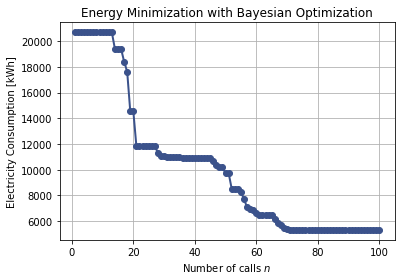

In [34]:
plot_convergence(res)
plt.ylabel('Electricity Consumption [kWh]')
plt.title('Energy Minimization with Bayesian Optimization')

In [35]:
res.fun

5322.3013

In [25]:
res.x

[10, 45, 5.5, 5, 0.7, 26, 2, 30]